このNotebookの内容

* ニューラルネットワークの学習
* numpyでの行列・テンソルの計算
* numpyを用いたニューラルネットのコーディング



# ニューラルネットの学習

## 問題の定式化

ここでは、ニューラルネットの学習の説明を単純にするために、中間のレイヤー（隠れ層）が1つのネットワーク構造を考える。

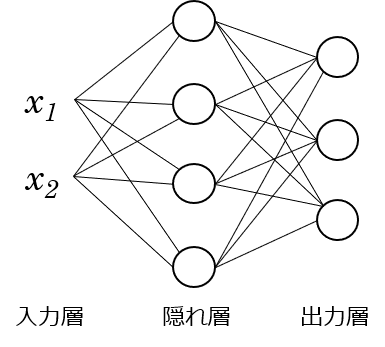

入力値、隠れ層の値、出力値、およびノード間の結合重みを以下のように定義する。ここで入力は$d$次元ベクトル、隠れ層のノード数は$m$、識別すべきクラス数は$c$とする。

入力値: ${\bf x} = (x_1, \dots, x_d)^T$

隠れ層の値: ${\bf h} = (h_1, \dots, h_m)^T$

出力値: ${\bf g} = (g_1, \dots, g_c)^T$

入力ノードと隠れ層ノードとの結合重み: ${\bf U} = \{u_{j \leftarrow i}\}$

隠れ層ノードと出力ノードとの結合重み: ${\bf W} = \{w_{k \leftarrow j}\}$

各ノードの計算は、入力の重み付き和に対してシグモイド関数などを用いて非線形変換を行う。この変換関数を活性化関数$f$とよぶ。活性化関数の役割は、入力の重み付き和（線型）が小さい値ならばノードの出力を0に近い値に、大きい値ならば1に近い値にする非線形変換を行うことである。この非線形変換の多くの組合せあるいは多段階の組合せによって、ネットワーク全体として複雑な非線形関数を表現する。

活性化関数の例として、[シグモイド関数](https://mathtrain.jp/sigmoid)がある。

シグモイド関数：$f(x) = \frac{1}{1+e^{-x}} $

このように定式化すると、出力層のノード$y_k$の出力は以下のように計算できる。

$y_k = f(\sum_j w_{k \leftarrow j} f(\sum_i u_{j \leftarrow i} x_i))$

## 誤差逆伝播法による学習手順

### 誤差関数と勾配降下法

学習データでは、個々の入力${\bf x}$について、正解のクラス番号$k \in \{1,\dots,c\}$ が与えられている。この正解を$c$次元のバイナリベクトル${\bf b}$（正解にあたる$k$次元目の値が1、残りは0）で表現する。${\bf b}$を教師信号またはターゲットとよぶ。

ニューラルネットの学習では、ネットワークの出力をターゲットに近づけることを目標とする。そのために出力とターゲットの差の二乗和を損失関数$J$と定義し、この$J$の値の最小化を目指す。

$J = \sum_k \frac{1}{2} (g_k - b_k)^2$



$E$はネットワークの重み ${\bf U}, {\bf W}$ の関数であるので、$J$ を特定の重みで偏微分して勾配を求め、$J$ が減少する方向に少しずつ重みを変化させることで $J$ を小さくしてゆく。$J$ が極小値を持つならば、極小値付近では勾配が0に近づくので、変化量が徐々に小さくなる。このことを利用して誤差関数の最小化を行う方法を勾配降下法とよぶ。ここで $\rho$ は学習係数であり、通常0.01程度の小さい値を設定する。

$w_{k \leftarrow j}' = w_{k \leftarrow j} - \rho \frac{\partial J}{\partial w_{k \leftarrow j}}$

### 隠れ層と出力層との間の重みの調整

まず、隠れ層と出力層との間の重み ${\bf W}$ の調整法を考える。いま、隠れ層の出力の重み付き和を以下のように定義する。

$s_k = \sum_j w_{k \leftarrow j} h_j$

活性化関数をシグモイド関数とすると、出力層の出力は以下のようになる。

$g_k = sigmoid(s_k)$

$E$ の勾配は以下のように計算できる。

$\frac{\partial J}{\partial w_{k \leftarrow j}} =  \frac{\partial J}{\partial g_k} \frac{\partial g_k}{\partial s_k} \frac{\partial s_k}{\partial w_{k \leftarrow j}}$

右辺第1項は $J$ の定義式から、以下のようになる。

$\frac{\partial J}{\partial g_k} = \frac{\partial}{\partial g_k} \frac{1}{2} (g_k - b_k)^2 = (g_k - b_k)$

右辺第2項は活性化関数の微分であり、$g_k'$ と表記しておく。たとえば、活性化関数としてシグモイド関数を採用すると、その微分（[参考](https://mathtrain.jp/sigmoid)）は以下のようになる。

$\frac{\partial g_k}{\partial s_k} = g_k (1 - g_k)$

右辺第3項は $s_k$ の定義式から、以下のようになる。

$\frac{\partial s_k}{\partial w_{k \leftarrow j}} = \frac{\partial}{w_{k \leftarrow j}} \sum_j w_{k \leftarrow j} h_j = h_j$

まとめると、$J$ の勾配は以下のようになり、これを勾配降下法の式に代入して学習が可能になる。

$\frac{\partial J}{\partial w_{k \leftarrow j}} =  (g_k - b_k) g_k' h_j$

なお、次の計算のために、誤差項 $\delta_k$ を以下のように定義する。

$\delta_k =  (g_k - b_k) g'_k$

### 入力層と隠れ層との間の重みの調整

次に、入力層と隠れ層との間の重み ${\bf U}$ の調整法を考える。いま、入力層の値の重み付き和を以下のように定義する。

$z_j = \sum_i u_{j \leftarrow i} x_i$

活性化関数をシグモイド関数とすると、隠れ層の出力は以下のようになる。

$h_j = sigmoid(z_j)$

$J$の勾配は以下のように計算できる。

$\frac{\partial J}{\partial u_{j \leftarrow i}} =  \frac{\partial J}{\partial h_j} \frac{\partial h_j}{\partial z_j} \frac{\partial z_j}{\partial u_{j \leftarrow i}}$

右辺第1項の計算は少し込み入ったものになる。$J$ に直接影響を与える変数は複数の $g_k$ であり、$g_k$ は $s_k$ から、$s_k$ は $h_j$ から計算されているので、右辺第1項は以下のようになる。

$\frac{\partial J}{\partial h_j} = \sum_k \frac{\partial J}{\partial g_k}\frac{\partial g_k}{\partial s_k}\frac{\partial s_k}{\partial h_j} $

ここで、上式右辺の和の内部第1項と第2項の積は誤差項$\delta_k$を使って以下のように書ける。

$\frac{\partial J}{\partial g_k}\frac{\partial g_k}{\partial s_k} = (g_k - b_k) g_k' = \delta_k$

和の内部第3項は以下のように計算できる。

$\frac{\partial s_k}{\partial h_j} = \frac{\partial}{\partial h_j} \sum_j w_{k \leftarrow j} h_j = w_{k \leftarrow j}$

従って、$J$の勾配式の右辺第1項は以下のようになる。

$\frac{\partial J}{\partial h_j} = \sum_k \delta_k w_{k \leftarrow j} $

右辺第2項は上の議論と同じく、$h_j'$と表記しておく。

右辺第3項は$z_j$の定義式から、以下のようになる。

$\frac{\partial z_j}{\partial u_{j \leftarrow i}} = \frac{\partial}{u_{j \leftarrow i}} \sum_i u_{j \leftarrow i} x_i = x_i$

まとめると、$J$の勾配は以下のようになり、これを勾配降下法の式に代入して学習が可能になる。

$\frac{\partial J}{\partial u_{j \leftarrow i}} =  \sum_k (\delta_k w_{k \leftarrow j}) h_j' x_i$

ここで、$\delta_k$は隠れ層と出力層の重みの調整時に求まっているものを使う。つまり、まず隠れ層と出力層の間の重み ${\bf W}$ の調整を行って、その時に求めた誤差 $\delta_k$ を用いて、入力層と隠れ層の重み ${\bf U}$ の調整を行う。この手順は隠れ層の階層が複数になっても、同様に適用できる。このように誤差が出力側から入力側に向かって伝わるので、この方法を誤差逆伝播法とよぶ。


# numpyでの行列・テンソルの計算

Pythonの数値計算ライブラリ numpy を用いると、ベクトル・行列・テンソル*の計算を簡潔なコードで記述することができる。

（* テンソルは多次元配列と理解しておけばよい。）

Pythonでは関数やクラスなどをまとめて書いたファイルをモジュールとよび、こちらが正確な呼び名であるが、モジュールのことをライブラリとよぶことも多い。

まず、使用するモジュールを冒頭で読み込む。Python では import <モジュール名> と宣言することで、
<モジュール名>.<関数名> のように関数を使用することができる。また、 import <モジュール名> as <別名> と宣言することで、
<別名>.<関数名> のように関数を使用することができる。この別名はモジュールによって慣習的に決まっていることが多い。numpy の別名は np を用いる。

In [ ]:
import numpy as np

## テンソルの計算

###和と積

テンソルの基本演算である加算は +演算子、掛け算は @演算子を用いる。これらを用いると、ループを用いた要素毎の演算をコーディングする必要はなく、数式の記述と同じようにコーディングできる。

また、numpyの関数にテンソルを渡すと、通常は要素毎に計算を行って同じshapeのテンソルを返す。　

In [ ]:
w = np.array([0.1, 0.2])
b = np.array(0.5)
X = np.array([[1.0, 1.5],
              [0.8, 1.2],
              [1.3, 0.9]])

In [ ]:
np.maximum(0, X @ w + b )

array([0.9 , 0.82, 0.81])

shapeの異なるテンソル同士の演算は、曖昧性がない場合は小さい方のテンソルが大きい方のテンソルのshapeに合うようにブロードキャストされる。ブロードキャストの手順は、まず小さい方のテンソルの軸が大きい方に合わせて追加され、その軸の方向に値が繰り返しコピーされると考えればよい。

###変換

テンソルはreshapeメソッド使って同じ要素数の形が異なるテンソルに変換できる。たとえば、28x28の2Dテンソルは、784の要素を持つベクトル（1Dテンソル）に変換できる。

注）要素が1個のタプルは、数が括弧で囲まれているものと区別するために 
(値,) の形となる。

In [ ]:
x = np.array([[1, 2],
              [3, 4],
              [5, 6]])
x.shape

(3, 2)

In [ ]:
x2 = x.reshape((2, 3))
print(x2)
x2.shape

[[1 2 3]
 [4 5 6]]


(2, 3)

In [ ]:
x3 = x.reshape((2*3,))
print(x3)
x3.shape

[1 2 3 4 5 6]


(6,)

行列の転置はTメソッドを呼び出す。

In [ ]:
x.T

array([[1, 3, 5],
       [2, 4, 6]])

# numpyを用いたニューラルネットのコーディング

ここでは Python の数値計算ライブラリ numpy を用いてニューラルネットのコーディングを行う。

対象とするネットワークの構造を以下の図に示す。ここでは、入力に加えるバイアス（b, b2）を別に扱っているが、上記の学習の説明において、入力の $d$ 次元ベクトルを定数項1を新たな次元として加えた $d+1$ 次元と読み替えてそのまま適用できる。このバイアス値も学習対象となる。

また、多階層に拡張が容易なように重みもw, w2と読み替えている。

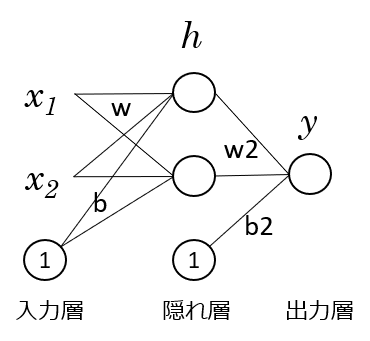

ここでは数学関数モジュール math と数値計算ライブラリ numpy を読み込んでおく。

In [ ]:
import math
import numpy as np

次に重み、バイアスの初期値を設定する。このコード内では、扱う行列・テンソルは numpy の ndarray とする。ndarray 型の変数は以下のように宣言する。ここで数値の後に小数点を付けているのは、動的型付けにおいて、自動的に浮動小数点数として宣言するためである（整数で表記して、dtype=np.float64 と付加してもよい）。

この重みを用いると、このネットワークは XOR 関数を実現していることになる。なお、一般にニューラルネットの重みの初期値は0近辺のもっと小さな値を用いる。

In [ ]:
w = np.array([[3.,4.], [2.,3.]])
b = np.array([[-2.,-4.]])
w2 = np.array([[5.,-5.]])
b2 = np.array([[-2.]])

次にシグモイド関数とその導関数を定義する。ここでは、1つの数値を引数として与えると、その演算結果を返す関数として定義し、 @np.vectorize というデコレータを付けて、ベクトルが入力されたら、各要素に対して演算を行い、その結果をベクトルとして返せるようにする。

In [ ]:
@np.vectorize
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

@np.vectorize
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))


入力と正解は以下のように定義する。



In [ ]:
x = np.array([1., 0.])
t = np.array([1.])

前向きの計算は以下のようになる。@演算子は行列の積、.Tは転置を表す。

In [ ]:
s = w @ x.T + b
h = sigmoid(s)
z = w2 @ h.T + b2
y = sigmoid(z)

In [ ]:
y

array([[0.7425526]])

## 練習問題

以下のコードで定義されるニューラルネットが XOR 関数を実現していることを確認できるようにコードを変更せよ。ただし、ネットワークの出力が0.5以上のとき真、0,5未満のとき偽と判定されたと解釈すること。

In [ ]:
import math
import numpy as np

# ネットワークの重み
w = np.array([[3.,4.], [2.,3.]])
b = np.array([[-2.,-4.]])
w2 = np.array([[5.,-5.]])
b2 = np.array([[-2.]])

# 活性化関数とその導関数
@np.vectorize
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

@np.vectorize
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

# 入力とターゲット
x = np.array([1., 0.])
t = np.array([1.])

# 前向き計算
s = w @ x.T + b
h = sigmoid(s)
z = w2 @ h.T + b2
y = sigmoid(z)

# 結果出力
print(f'result = {y[0][0]:.3f}')

result = 0.743


## 解答例

### 練習問題

練習問題のコードを実行してから、以下のコードを実行する

In [ ]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
Target = np.array([0., 1., 1., 0.])

# 前向き計算
def forward(x):
  s = w @ x.T + b
  h = sigmoid(s)
  z = w2 @ h.T + b2
  y = sigmoid(z)
  return y

for x in X:
  y = forward(x)
  print(f'input = {x}  result = {y[0][0]:.3f}')

input = [0. 0.]  result = 0.183
input = [0. 1.]  result = 0.743
input = [1. 0.]  result = 0.743
input = [1. 1.]  result = 0.334
